# Import Data

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBRegressor

In [114]:
df_train = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')
df_test = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv')

# Data

## Train set

In [115]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [116]:
df_train.describe()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,3960.000000,3960.000000,2421.000000,3022.000000,3027.000000,3076.000000,898.000000,2954.000000,2967.000000,2954.000000,...,2728.000000,2725.000000,2728.000000,2730.000000,2733.000000,2736.000000,2609.000000,2606.000000,3301.000000,2736.000000
mean,10.433586,0.372727,65.454771,19.331929,55.946713,89.038615,27.278508,69.648951,81.597236,116.983074,...,1.452346,1.627890,1.613636,1.158974,0.943652,27.896199,41.088923,57.763622,1.060588,0.580409
std,3.574648,0.483591,22.341862,5.113934,7.473764,44.569040,5.567287,13.611226,13.665196,17.061225,...,1.495600,1.445622,1.529178,1.343661,1.185460,20.338853,10.427433,13.196091,1.094875,0.771122
min,5.000000,0.000000,25.000000,0.000000,33.000000,0.000000,18.000000,0.000000,27.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,38.000000,0.000000,0.000000
25%,8.000000,0.000000,59.000000,15.869350,50.000000,57.200000,23.000000,61.000000,72.000000,107.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,33.000000,47.000000,0.000000,0.000000
50%,10.000000,0.000000,65.000000,17.937682,55.000000,77.000000,26.000000,68.000000,81.000000,114.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000,39.000000,55.000000,1.000000,0.000000
75%,13.000000,1.000000,75.000000,21.571244,62.000000,113.800000,30.000000,76.000000,90.500000,125.000000,...,2.000000,3.000000,2.000000,2.000000,1.000000,41.000000,46.000000,64.000000,2.000000,1.000000
max,22.000000,1.000000,999.000000,59.132048,78.500000,315.000000,50.000000,179.000000,138.000000,203.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,93.000000,96.000000,100.000000,3.000000,3.000000


In [117]:
df_train.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
df_train.shape

(3960, 82)

## Test set

In [119]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      20 non-null     object 
 1   Basic_Demos-Enroll_Season               20 non-null     object 
 2   Basic_Demos-Age                         20 non-null     int64  
 3   Basic_Demos-Sex                         20 non-null     int64  
 4   CGAS-Season                             10 non-null     object 
 5   CGAS-CGAS_Score                         8 non-null      float64
 6   Physical-Season                         14 non-null     object 
 7   Physical-BMI                            13 non-null     float64
 8   Physical-Height                         13 non-null     float64
 9   Physical-Weight                         13 non-null     float64
 10  Physical-Waist_Circumference            5 non-null      float64


In [120]:
df_test.describe()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday
count,20.000000,20.000000,8.000000,13.000000,13.000000,13.000000,5.000000,11.000000,12.000000,11.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,1.00,9.000000,10.000000,10.00000,16.000000
mean,10.750000,0.400000,62.500000,19.835939,52.961538,79.200000,25.400000,70.545455,81.666667,117.545455,...,28.486750,15.457795,56.989275,25.985962,45.167825,1.04,2.372333,36.800000,52.30000,1.437500
std,3.725799,0.502625,11.275764,4.927625,6.942357,23.632181,3.130495,18.806189,9.316001,21.262002,...,5.099449,4.021153,14.490362,7.479799,11.940000,NaN,1.080099,5.533735,7.02456,1.152895
min,5.000000,0.000000,50.000000,14.035590,37.500000,46.000000,22.000000,57.000000,70.000000,95.000000,...,21.035200,8.895360,38.917700,15.410700,27.055200,1.04,1.100000,27.000000,40.00000,0.000000
25%,9.000000,0.000000,51.000000,16.861286,48.000000,60.200000,24.000000,60.500000,74.500000,102.500000,...,24.230725,13.815400,44.627250,19.801775,37.245575,1.04,1.270000,33.500000,47.75000,0.000000
50%,10.000000,0.000000,63.000000,18.292347,55.000000,81.600000,24.000000,63.000000,80.000000,116.000000,...,29.470400,16.402450,59.199050,26.337750,46.608850,1.04,2.340000,37.500000,53.50000,2.000000
75%,12.250000,1.000000,71.000000,21.079065,57.750000,85.600000,27.000000,73.000000,90.250000,119.500000,...,31.398725,17.674625,65.222050,30.421100,51.860475,1.04,3.020000,39.750000,55.75000,2.000000
max,19.000000,1.000000,80.000000,30.094649,60.000000,121.600000,30.000000,123.000000,97.000000,163.000000,...,36.057200,20.902000,79.698200,36.223200,63.126500,1.04,4.110000,46.000000,64.00000,3.000000


In [121]:
df_test.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
df_test.shape

(20, 59)

The train set has 82 features, while test set only has 59.

# PCIAT features

- The features missing from test data are all PCIAT features
- Keep the PCIAT-PCIAT_Total to use as target variable


In [123]:
# Find additional columns in train dataset
additional_columns = set(df_train.columns) - set(df_test.columns)
additional_columns.remove('sii')
additional_columns.remove('PCIAT-PCIAT_Total')
print(additional_columns)

{'PCIAT-PCIAT_15', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_20', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_18', 'PCIAT-Season', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_03'}


In [124]:
# Drop them
df_train = df_train.drop(additional_columns, axis=1)
df_train.shape

(3960, 61)

# Numerical & Categorical

In [125]:
# Get the numerical and categorical features
def get_categorical_features(df):
    categorical_features = [var for var in df.columns if df[var].dtype=='O']
    categorical_features.remove('id') if 'id' in categorical_features else None
    return categorical_features

def get_numerical_features(df):
    numerical_features = [var for var in df.columns if df[var].dtype!='O']
    numerical_features.remove('sii') if 'sii' in numerical_features else None
    return numerical_features

In [126]:
# Categorical features
categorical_features_train = get_categorical_features(df_train)
categorical_features_train

['Basic_Demos-Enroll_Season',
 'CGAS-Season',
 'Physical-Season',
 'Fitness_Endurance-Season',
 'FGC-Season',
 'BIA-Season',
 'PAQ_A-Season',
 'PAQ_C-Season',
 'SDS-Season',
 'PreInt_EduHx-Season']

In [127]:
numerical_features_train = get_numerical_features(df_train)
numerical_features_train.remove('PCIAT-PCIAT_Total')
numerical_features_train

['Basic_Demos-Age',
 'Basic_Demos-Sex',
 'CGAS-CGAS_Score',
 'Physical-BMI',
 'Physical-Height',
 'Physical-Weight',
 'Physical-Waist_Circumference',
 'Physical-Diastolic_BP',
 'Physical-HeartRate',
 'Physical-Systolic_BP',
 'Fitness_Endurance-Max_Stage',
 'Fitness_Endurance-Time_Mins',
 'Fitness_Endurance-Time_Sec',
 'FGC-FGC_CU',
 'FGC-FGC_CU_Zone',
 'FGC-FGC_GSND',
 'FGC-FGC_GSND_Zone',
 'FGC-FGC_GSD',
 'FGC-FGC_GSD_Zone',
 'FGC-FGC_PU',
 'FGC-FGC_PU_Zone',
 'FGC-FGC_SRL',
 'FGC-FGC_SRL_Zone',
 'FGC-FGC_SRR',
 'FGC-FGC_SRR_Zone',
 'FGC-FGC_TL',
 'FGC-FGC_TL_Zone',
 'BIA-BIA_Activity_Level_num',
 'BIA-BIA_BMC',
 'BIA-BIA_BMI',
 'BIA-BIA_BMR',
 'BIA-BIA_DEE',
 'BIA-BIA_ECW',
 'BIA-BIA_FFM',
 'BIA-BIA_FFMI',
 'BIA-BIA_FMI',
 'BIA-BIA_Fat',
 'BIA-BIA_Frame_num',
 'BIA-BIA_ICW',
 'BIA-BIA_LDM',
 'BIA-BIA_LST',
 'BIA-BIA_SMM',
 'BIA-BIA_TBW',
 'PAQ_A-PAQ_A_Total',
 'PAQ_C-PAQ_C_Total',
 'SDS-SDS_Total_Raw',
 'SDS-SDS_Total_T',
 'PreInt_EduHx-computerinternet_hoursday']

In [128]:
categorical_features_test = get_categorical_features(df_test)
numerical_features_test = get_numerical_features(df_test)

# Missing Values

- There is a large number of missing values within the dataset, with 57 columns containing missing values.

In [129]:
# Show missing values
def show_missing_values(df):
    missing_counts = df_train.isnull().sum()
    missing_counts = missing_counts[missing_counts > 0]

    print(f"Total columns with missing values: {len(missing_counts)}")

    # Visualize 
    plt.figure(figsize=(12, len(missing_counts) * 0.15))
    missing_counts.sort_values(ascending=True).plot(kind='barh', color='skyblue', edgecolor='black')
    plt.title("Number of Missing Values per Column", fontsize=16)
    plt.ylabel("Number of Missing Values", fontsize=14)
    plt.xlabel("Columns", fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.show()

Total columns with missing values: 57


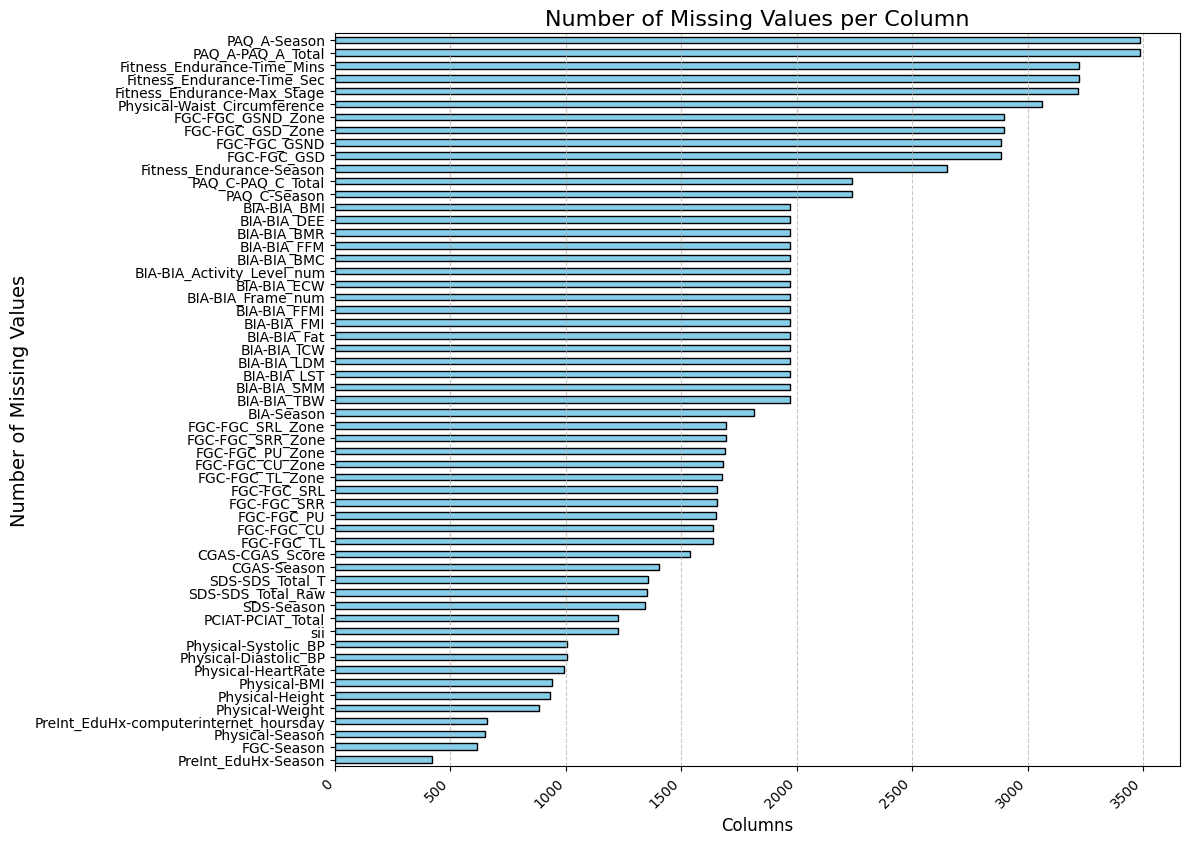

In [130]:
show_missing_values(df_train)

In [131]:
# Columns with more than 50% missing values
half_missing = [val for val in df_train.columns[df_train.isnull().sum()>len(df_train)/2]]
half_missing

['Physical-Waist_Circumference',
 'Fitness_Endurance-Season',
 'Fitness_Endurance-Max_Stage',
 'Fitness_Endurance-Time_Mins',
 'Fitness_Endurance-Time_Sec',
 'FGC-FGC_GSND',
 'FGC-FGC_GSND_Zone',
 'FGC-FGC_GSD',
 'FGC-FGC_GSD_Zone',
 'PAQ_A-Season',
 'PAQ_A-PAQ_A_Total',
 'PAQ_C-Season',
 'PAQ_C-PAQ_C_Total']

# Distribution

## Age

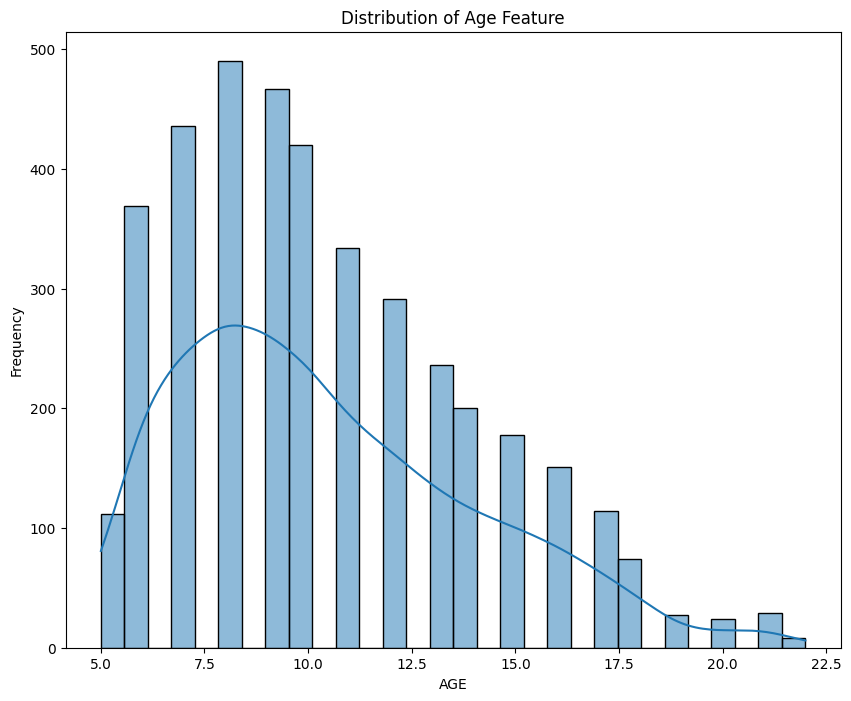

In [132]:
# Age Distribution
plt.figure(figsize=(10, 8))
sns.histplot(df_train['Basic_Demos-Age'], bins=30, kde=True)  
plt.title('Distribution of Age Feature')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.show()

## Gender

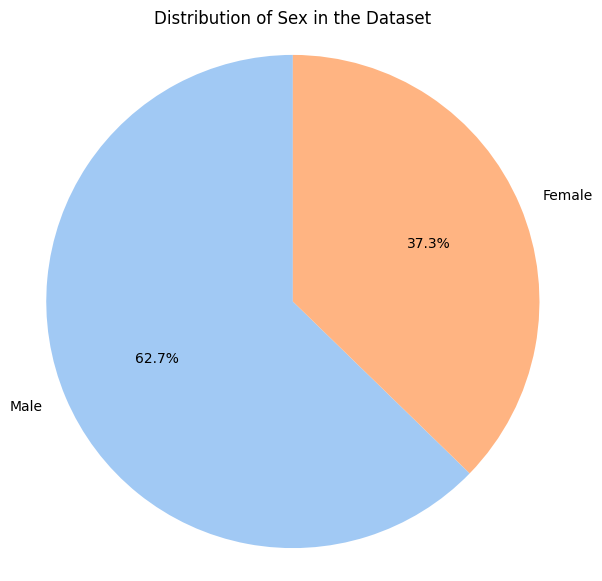

In [133]:
# Gender distribution
sex_cnt = df_train['Basic_Demos-Sex'].value_counts()

sex_cnt.index = sex_cnt.index.map({0: 'Male', 1: 'Female'})

plt.figure(figsize=(7, 7))
plt.pie(sex_cnt, labels=sex_cnt.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Sex in the Dataset')
plt.axis('equal')
plt.show()

## Enrollment season

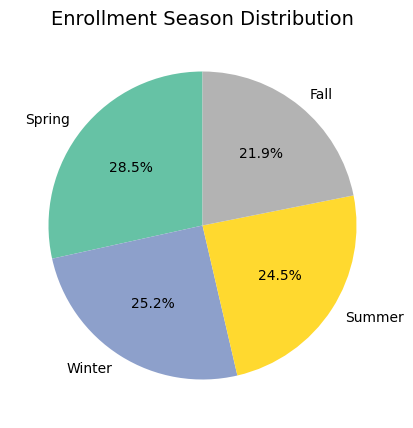

In [134]:
plt.figure(figsize=(5, 5))

df_train['Basic_Demos-Enroll_Season'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    cmap='Set2',
)

plt.title('Enrollment Season Distribution', fontsize=14)
plt.ylabel('')
plt.show()

## Label count

C:\Users\HLC\AppData\Local\Temp\ipykernel_18820\1029806898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_train, x = 'sii', palette=colors).set_title('Count of sii')


Text(0.5, 1.0, 'Count of sii')

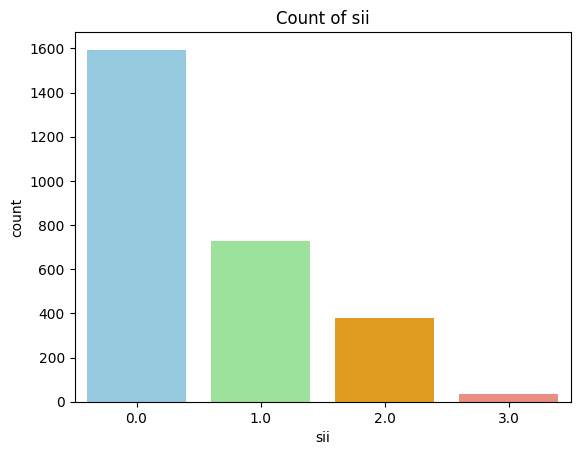

In [135]:
colors = ['skyblue', 'lightgreen', 'orange', 'salmon']

sns.countplot(df_train, x = 'sii', palette=colors).set_title('Count of sii')

- 0 label has more values than all of the other labels.

# Time-series Data

- Time-series statistics (e.g., mean, standard deviation) from actigraphy data can be calculated and merged into the main dataset to create additional features for model training.

In [136]:
import os
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

# Process actigraphy data

def process_file(filename, dirname):
    df = pd.read_parquet(os.path.join(dirname, filename, 'part-0.parquet'))
    df.drop('step', axis=1, inplace=True)
    stats = df.describe().values.reshape(-1)
    participant_id = filename.split('=')[1]

    return stats, participant_id

def load_time_series(dirname) -> pd.DataFrame:
    ids = os.listdir(dirname)

    with ThreadPoolExecutor() as executor:
        results = list(tqdm(
            executor.map(lambda fname: process_file(fname, dirname), ids),
            total=len(ids),
            desc="Processing time-series files"
        ))

    stats, participant_ids = zip(*results)

    df_stats = pd.DataFrame(stats, columns=[f"stat_{i}" for i in range(len(stats[0]))])
    df_stats['id'] = participant_ids

    return df_stats

def merge_time_series(df, dirname):
    df_stats = load_time_series(dirname)

    df_merged = pd.merge(df, df_stats, on='id', how='left')

    return df_merged

In [137]:
train_dir = '/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet'
test_dir = '/kaggle/input/child-mind-institute-problematic-internet-use/series_test.parquet'

df_train = merge_time_series(df_train, train_dir)
df_test = merge_time_series(df_test, test_dir)

Processing time-series files: 100%|██████████| 2/2 [00:00<00:00, 16.30it/s]


# Data Processing

## Handling missing values

- Deletes all rows that sii is missing.

In [138]:
# Delete all rows that target variable is missing
df_train.dropna(axis=0, how='any', subset=['sii'], inplace=True)

## Mapping for categorical features

- Approach 1: Mapping each category to an integer.
- Approach 2: Using One-hot encoding technique to transform each each season feature into 4 columns (currently use)

In [139]:
from sklearn.preprocessing import OneHotEncoder

# Mapping
# season_mapping = {
#     'Spring': 0,
#     'Summer': 1,
#     'Fall': 2,
#     'Winter': 3
# }

# df_train.replace(season_mapping, inplace=True)
# df_test.replace(season_mapping, inplace=True)

# One-hot encoding
def one_hot_encode(df, categorical_features, encoder=None):
    if encoder is None:
        encoder = OneHotEncoder(sparse_output=False)
        one_hot_encoded = encoder.fit_transform(df[categorical_features])
    else:
        one_hot_encoded = encoder.transform(df[categorical_features])

    one_hot_encoded_df = pd.DataFrame(
        one_hot_encoded, 
        columns=encoder.get_feature_names_out(categorical_features),
        index=df.index
    )

    df = df.drop(columns=categorical_features)
    df = pd.concat([df, one_hot_encoded_df], axis=1)

    return df, encoder

df_train, encoder = one_hot_encode(df_train, categorical_features_train)
df_test, _ = one_hot_encode(df_test, categorical_features_test, encoder=encoder)

## Scale numerical features

### Feature Standardization
- Makes the value of each feature in the data have zero-mean and unit-variance.
- z = (x - u) / s. where u is the mean of the training samples, and s is the standard deviation.


In [140]:
# Scaler
scaler = StandardScaler()
df_train[numerical_features_train] = scaler.fit_transform(df_train[numerical_features_train])
df_test[numerical_features_test] = scaler.transform(df_test[numerical_features_test])

# Map predictions to sii categories

In [141]:
def convert(scores):
    scores = np.array(scores)*1.252 # scaling factor of 1.25 gives a better overall QWK score.
    bins = np.zeros_like(scores)
    bins[scores <= 30] = 0
    bins[(scores > 30) & (scores < 50)] = 1
    bins[(scores >= 50) & (scores < 80)] = 2
    bins[scores >= 80] = 3
    return bins

In [142]:
# Scoring
from sklearn.metrics import make_scorer

def quadratic_weighted_kappa(y_true, y_pred):
    return cohen_kappa_score(convert(y_true), convert(y_pred), weights='quadratic')

kappa_scorer = make_scorer(quadratic_weighted_kappa, greater_is_better=True)

# Feature Selection

## Correlation 

- Correlation between features and target variable

In [143]:
df_train.drop(['id'], axis=1, inplace=True)

corr = pd.DataFrame(df_train.corr()['PCIAT-PCIAT_Total'].sort_values(ascending = False))
corr.style.background_gradient(cmap='YlOrRd')

,PCIAT-PCIAT_Total
PCIAT-PCIAT_Total,1.000000
sii,0.899681
Physical-Height,0.420765
Basic_Demos-Age,0.409559
PreInt_EduHx-computerinternet_hoursday,0.374124
Physical-Weight,0.353048
Physical-Waist_Circumference,0.327013
FGC-FGC_CU,0.287494
BIA-BIA_BMI,0.248060
Physical-BMI,0.240858


In [144]:
# Get features with correlation with PCIAT-PCIAT_Total greater than 0.1
corr_features = corr.loc[
    (corr['PCIAT-PCIAT_Total'].abs() > 0.1)
].index.difference(['PCIAT-PCIAT_Total', 'sii']).tolist()

## Selection

- Drop all columns missing more than half of its value.
- Choose columns with correlation with target variable more than 0.1

In [145]:
selected_features = list(set(corr_features) - set(half_missing))
selected_features

['FGC-FGC_SRR_Zone',
 'FGC-FGC_PU',
 'PAQ_A-Season_Winter',
 'FGC-FGC_CU',
 'stat_84',
 'BIA-BIA_BMI',
 'stat_87',
 'Physical-Height',
 'SDS-SDS_Total_Raw',
 'stat_80',
 'stat_63',
 'BIA-BIA_FFMI',
 'stat_29',
 'stat_51',
 'stat_30',
 'stat_85',
 'stat_65',
 'PAQ_A-Season_nan',
 'Fitness_Endurance-Season_nan',
 'Physical-BMI',
 'PreInt_EduHx-computerinternet_hoursday',
 'stat_77',
 'Basic_Demos-Age',
 'stat_32',
 'stat_24',
 'stat_37',
 'stat_15',
 'FGC-FGC_TL',
 'SDS-SDS_Total_T',
 'stat_36',
 'Physical-Weight',
 'stat_75',
 'FGC-FGC_SRL_Zone',
 'PAQ_A-Season_Fall',
 'Physical-Systolic_BP',
 'BIA-BIA_Frame_num',
 'PAQ_C-Season_nan',
 'stat_17',
 'stat_27']

# Train the model

## XGBoost Regressor
- Efficient handling of missing values (data preprocessing not required)
- Tuned using Grid search to find best set of hyperparameters

### Train/Evaluate

In [146]:
X_df_train = df_train[selected_features]
y = df_train['PCIAT-PCIAT_Total']

X_df_test = df_test[selected_features]

In [147]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_df_train, y, test_size=0.2, random_state=42)

In [148]:
# Model
xgb_params = {
    'colsample_bytree': 0.9, 
    'learning_rate': 0.04, 
    'max_depth': 3, 
    'n_estimators': 100, 
    'subsample': 0.5
}

xgb_model = XGBRegressor(**xgb_params)

In [149]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [150]:
y_pred = xgb_model.predict(X_test)

In [151]:
# Evaluate
y_test = convert(y_test)
y_pred = convert(y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

Accuracy: 0.4762773722627737
Precision: 0.48108995254116266
Recall: 0.4762773722627737
F1: 0.4686611445658969


c:\Users\HLC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Use the model on test dataset

In [152]:
# Predict
y_pred = xgb_model.predict(X_df_test)

In [153]:
y_pred = convert(y_pred)

### Results

In [154]:
submission = pd.DataFrame({'id': df_test['id'], 'sii': y_pred})
submission['sii'] = submission['sii'].astype(int)
submission.to_csv('submission.csv', index=False)
submission

,id,sii
0,00008ff9,0
1,000fd460,0
2,00105258,1
3,00115b9f,0
4,0016bb22,1
5,001f3379,1
6,0038ba98,1
7,0068a485,1
8,0069fbed,1
9,0083e397,1
